TKO_3120 Machine Learning and Pattern Recognition

Image recognition exercise


## Introduction

Write an introductory chapter for your report **(1 p)**
<br>E.g.
- What is the purpose of this task?
- What kind of data were used? Where did it originate?
- Which methods did you use?

Three sets of image URLs provided as text files (in Moodle): grass, sand and stairs

Images are with different resolution and dimensions
Images have been gathered from https://unsplash.com/

## Data preparation

Perform preparations for the data **(3 p)**
- import all the packages needed for this notebook in one cell
- read the URL:s from the text files and import the images
- crop and/or resize the images into same size
- for GLCM and GLRLM, change the images into grayscale and reduce the quantization level, e.g. to 8 levels

## Feature extraction

### First order texture measures (6 features)

- Calculate the below mentioned color features for each image **(1 p)**
    - Mean for each RGB color channel
    - Variance for each RGB color channel

### Second order texture measures (4 features)

- Gray-Level-Co-Occurrence (GLCM) features (4 features) **(2 p)**
    - For each image
        - calculate the GLC matrix
        - calculate the "correlation" feature using the GLC matrix that you acquired
            - in horizontal and vertical directions for two reference pixel distances (you can choose the distances)
        - explain your choise for the distances<br>

Gather your features into an input array X, and the image classes into an output array y. Standardize the feature values in X.

## Feature relationships

Make illustrations of the feature relationships, and discuss the results

### Pairplot

- Pairplot **(1 p)**
    - Which feature pairs possess roughly linear dependence?

### Histograms

- Histograms **(1 p)**
    - Plot a histogram for each Z-scored feature. Plot all the image classes in the same figure and use different color for each.
    - Which features may have some discriminative power over image classes according to the histograms? <br>

### PCA

- PCA **(1 p)**
    - Plot the image glasses using different colors.
    - Can you see clusters in PCA?
    - Does this figure give you any clues, how well you will be able to classify the image types? Explain.

## Build classifiers and select the best hyperparameters with cross validation

Perform model selection for each classifier. Use 5-fold stratified cross validation (*StratifiedKFold* and *GridSearchCV* from sklearn). Use the following hyperparameters:

- Ridge Classifier (1 p)
    - strength of the regularization term: alpha = [0.001, 0.01, 0.1, 1.0]

- Random Forest **(1 p)**
    - n_estimators from 100 to 300 with 50 steps
    - max_features = ['sqrt', 'log2', None]
    - whether to use bootstrap or not
    
- MLP **(1 p)**
    - use one hidden layer
    - number of neurons in the hidden layer from 15 to 40 in 5 neuron steps
    - activation function: hyperbolic tanh function and rectified linear unit function
    - solver: stochastic gradient descent and adam
    - validation_fraction: 0.1 and 0.3
    - strength of the L2 regularization term: alpha = [0.01, 0.1, 1]

For each classifier:
- Report the selected combination of hyperparameters <br>
- Report the accuracy value for each hyperparameter combination <br>

For Random Forest model, report the feature importance for each feature. Which features seem to be the most important? Does this correspond with the observations you made in the data exploration? **(1 p)**

## Estimate the performance of the models with nested cross-validation

Estimate the performance of each model using nested cross validation. <br>
We'll use 4-fold Stratified Kfold cross-validation and the same parameter ranges as earlier for the inner loop. <br>
For the outer loop we'll use 5-fold Stratified Kfold cross-validation.

For each classifier:
- Ridge Classifier **(1 p)**
- Random Forest **(1 p)**
- MLP **(1 p)**

    Report the selected combination of the hyperparameters and the accuracy value for the best hyperparameter combination. <br>
    Create a confusion matrix of the results. <br>
    Calculate the mean accuracy of the outer rounds. What does it mean? **(1 p)**

## Discussion

- Discuss you results **(2 p)**
<br>E.g.
    - Which model performs the best and why?
    - What are the limitations?
    - How could the results be improved?

_______________________________________________________________________________
_______________________________________________________________________________


## TKO_3120 Machine Learning and Pattern Recognition - Exercise Work
## Name: Ayesha Zafar



________________________________________________________________________________
________________________________________________________________________________

# PART 1 - INTRODUCTION

The goal of this task was to classify images into three predefined categories — grass, sand, and stairs — by building and evaluating machine learning models. The task involved extracting meaningful texture-based features from the images, optimizing model performance through hyperparameter tuning, and evaluating how well the models generalize to unseen data using nested cross-validation. This provided a comprehensive workflow, covering everything from data preparation and feature extraction to model selection and performance analysis.

### 1.1 Dataset
The dataset consisted of images representing different textures, sourced from URLs provided in text files. Each image was preprocessed to ensure consistency in size and format. This included resizing and converting the images to grayscale, which simplified the feature extraction process and helped the models focus on texture patterns rather than color variations.

### 1.2 Methods
To tackle the classification task, several key methods were used:

1. **Data Preparation:** The images were resized and converted to grayscale for consistency. Grayscale images were quantized to reduce the number of intensity levels, which made texture analysis more effective.
2. **Feature Extraction:** First-order texture features, such as mean and variance of RGB channels, were extracted. Second-order features were computed using the Gray-Level Co-Occurrence Matrix (GLCM) and Gray-Level Run-Length Matrix (GLRLM) to capture more complex texture patterns.
3. **Model Building:** Three classifiers were tested — Ridge Classifier, Random Forest, and Multi-Layer Perceptron (MLP). Model selection and hyperparameter tuning were performed using 5-fold stratified cross-validation with GridSearchCV.
4. **Model Evaluation:** Performance was estimated using nested cross-validation. A 4-fold stratified cross-validation was used in the inner loop for hyperparameter tuning with GridSearchCV, and a 5-fold stratified cross-validation was used in the outer loop for performance evaluation.

### 1.3 Objective
The main objective was to:

1. Develop an effective image classification pipeline using machine learning techniques.
2. Identify the best performing model through systematic hyperparameter tuning.
3. Analyze the model’s performance using accuracy scores and confusion matrices to understand how well it generalizes to new data.

_________________
_________________


# PART 2 - DATA PREPARATION

In this part, the dataset was prepared for model training and feature extraction. First, all necessary Python libraries were imported to ensure smooth execution of the code. The image URLs were read from the provided text files, and the images were imported. To standardize the data, the images were cropped and resized to a uniform size. For texture feature extraction, the images were converted to grayscale and the quantization level was reduced to 8 levels to simplify the texture analysis and improve computational efficiency.

### Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io
import os
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage.feature import graycomatrix, graycoprops
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

### Data loading and printing

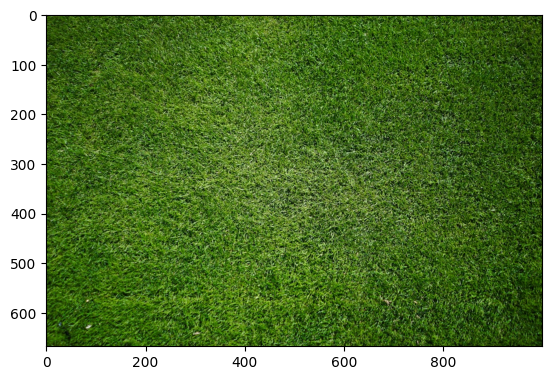

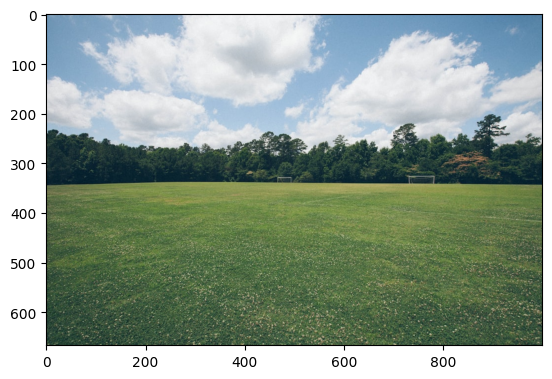

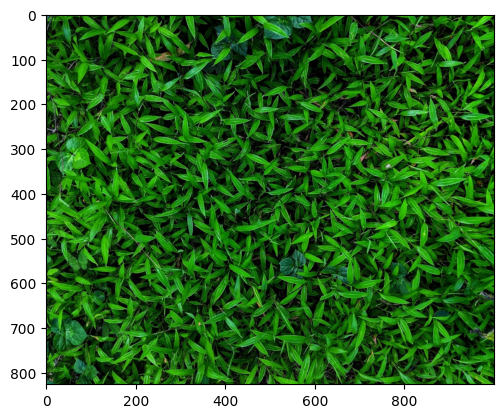

In [ ]:
grass_urls = np.loadtxt('grass.txt', dtype='U150')
grass_imgs = []

for url in grass_urls:
    grass = io.imread(url)
    grass_imgs.append(grass)

for img in grass_imgs[:3]:
  plt.imshow(img)
  plt.show()

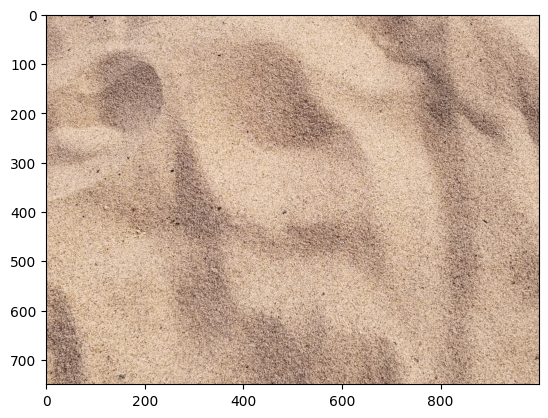

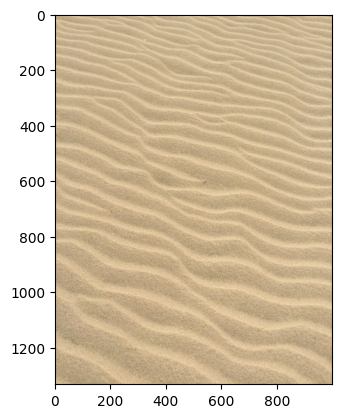

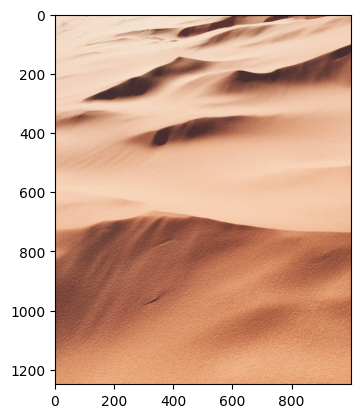

In [ ]:
sand_urls = np.loadtxt('sand.txt', dtype='U150')
sand_imgs = []

for url in sand_urls:
    sand = io.imread(url)
    sand_imgs.append(sand)

for img in sand_imgs[:3]:
  plt.imshow(img)
  plt.show()

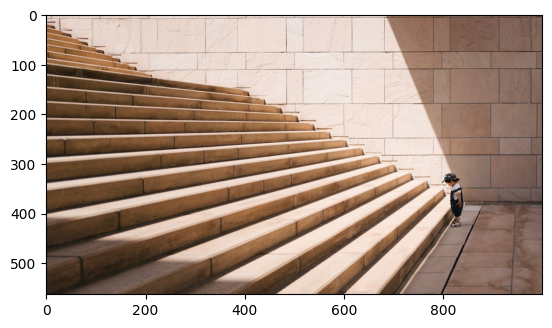

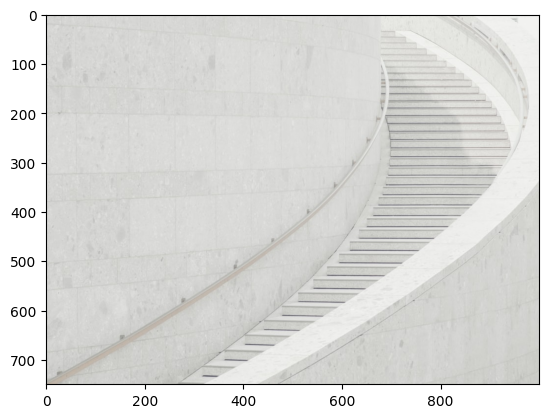

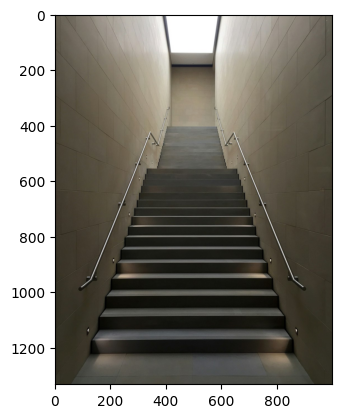

In [ ]:
stairs_urls = np.loadtxt('stairs.txt', dtype='U150')
stairs_imgs = []

for url in stairs_urls:
    stairs = io.imread(url)
    stairs_imgs.append(stairs)

for img in stairs_imgs[:3]:
  plt.imshow(img)
  plt.show()

### Resizing all images to (256,256) and printing before vs after images

In [ ]:
target_size = (256, 256)
grass_imgs_resized = [resize(img, target_size) for img in grass_imgs]
sand_imgs_resized = [resize(img, target_size) for img in sand_imgs]
stairs_imgs_resized = [resize(img, target_size) for img in stairs_imgs]

Before
(667, 1000, 3)


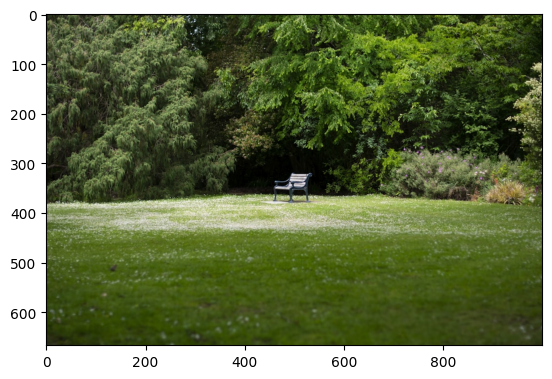

After
(256, 256, 3)


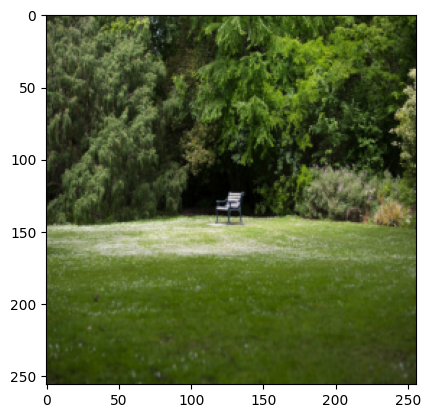

In [ ]:
print("Before")
plt.imshow(grass_imgs[17])
print(grass_imgs[17].shape)
plt.show()

print("After")
plt.imshow(grass_imgs_resized[17])
print(grass_imgs_resized[17].shape)
plt.show()

Before
(667, 1000, 3)


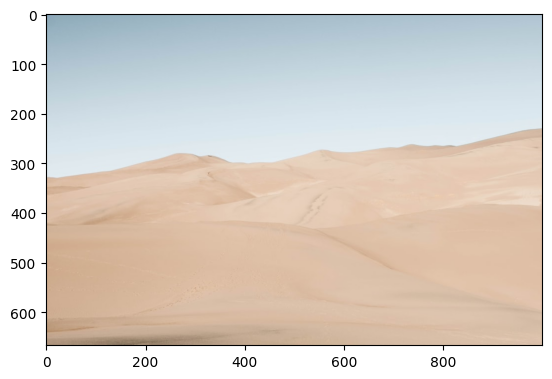

After
(256, 256, 3)


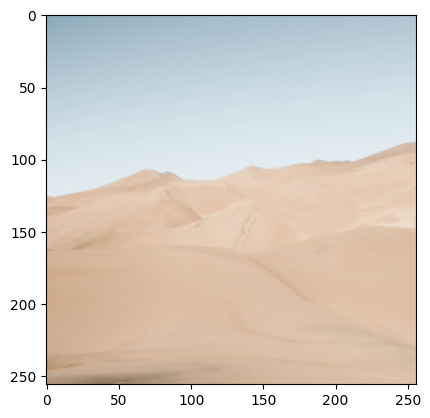

In [ ]:
print("Before")
plt.imshow(sand_imgs[17])
print(sand_imgs[17].shape)
plt.show()

print("After")
plt.imshow(sand_imgs_resized[17])
print(sand_imgs_resized[17].shape)
plt.show()

Before
(1529, 1000, 3)


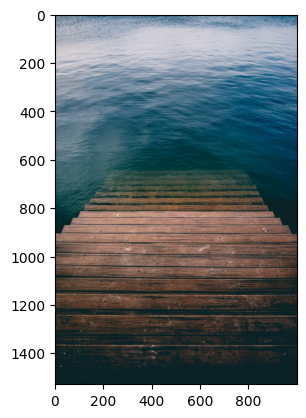

After
(256, 256, 3)


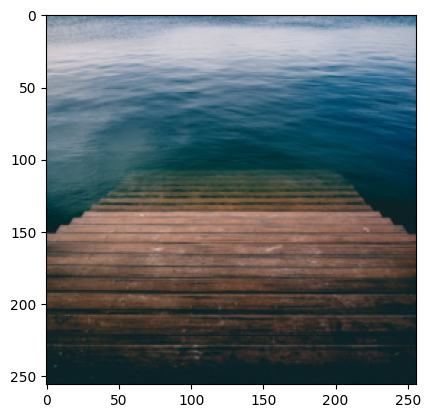

In [ ]:
print("Before")
plt.imshow(stairs_imgs[17])
print(stairs_imgs[17].shape)
plt.show()

print("After")
plt.imshow(stairs_imgs_resized[17])
print(stairs_imgs_resized[17].shape)
plt.show()

### Changing images to grayscale and printing new images

In [ ]:
grass_imgs_gray = [rgb2gray(img) for img in grass_imgs_resized]
sand_imgs_gray = [rgb2gray(img) for img in sand_imgs_resized]
stairs_imgs_gray = [rgb2gray(img) for img in stairs_imgs_resized]

(256, 256)


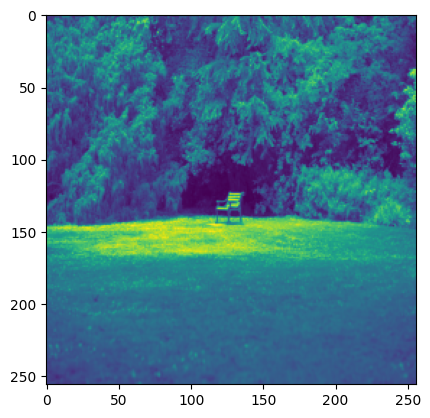

(256, 256)


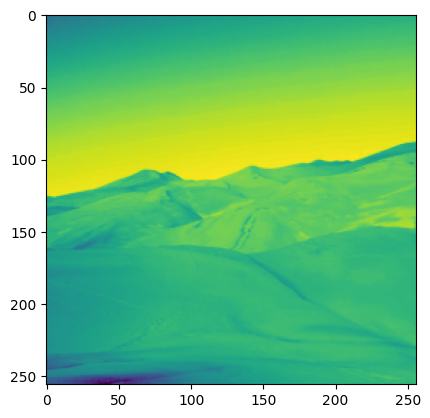

(256, 256)


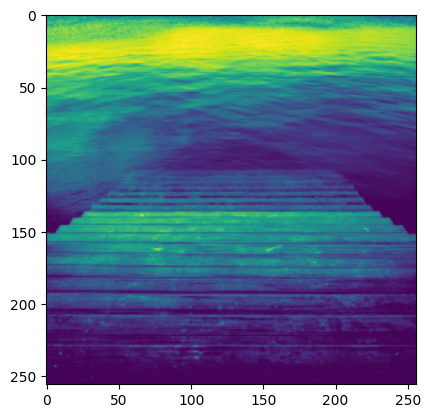

In [ ]:
plt.imshow(grass_imgs_gray[17])
print(grass_imgs_gray[17].shape)
plt.show()

plt.imshow(sand_imgs_gray[17])
print(sand_imgs_gray[17].shape)
plt.show()

plt.imshow(stairs_imgs_gray[17])
print(stairs_imgs_gray[17].shape)
plt.show()

### Reducing quantization

In [ ]:
# Verifying pixel range
print(grass_imgs_gray[17].min(), grass_imgs_gray[17].max())
print(sand_imgs_gray[17].min(), sand_imgs_gray[17].max())
print(stairs_imgs_gray[17].min(), stairs_imgs_gray[17].max())

0.0008041574086036494 0.9036700031956074
0.46665384151203515 0.9279635871306464
0.10731492119755483 0.8313089172763286


In [ ]:
# Since pixel range is [0,1], we are going to scale to range [0, 7] by multiplying by 7 and converting to integer
grass_imgs_quantized = [np.floor(img * 7).astype(int) for img in grass_imgs_gray]
sand_imgs_quantized = [np.floor(img * 7).astype(int) for img in sand_imgs_gray]
stairs_imgs_quantized = [np.floor(img * 7).astype(int) for img in stairs_imgs_gray]

In [ ]:
# Printing new pixel range
print("Grass quantized image: ", grass_imgs_quantized[17].min(), grass_imgs_quantized[17].max())
print("Sand quantized image: ", sand_imgs_quantized[17].min(), sand_imgs_quantized[17].max())
print("Stairs quantized image: ", stairs_imgs_quantized[17].min(), stairs_imgs_quantized[17].max())

Grass quantized image:  0 6
Sand quantized image:  3 6
Stairs quantized image:  0 5


_________________
_________________

# PART 3 - FEATURE EXTRACTION

In this section, we describe the process of extracting features from the images to prepare them for classification. The features were divided into two categories: first-order texture measures and second-order texture measures.

These features were then standardized to ensure consistent scaling across the dataset.

### 3.1 First-Order Texture Measures
First-order texture measures are derived from the intensity values of the pixels in the image. For each image, the following features were calculated:

1. **Mean for each RGB color channel:** The mean intensity value was computed for the red, green, and blue channels separately. This provides information about the average color intensity in each channel.
2. **Variance for each RGB color channel:** The variance of the intensity values was computed for the red, green, and blue channels. This measures the spread or variability of the pixel intensities in each channel.

In total, 6 first-order features were extracted for each image (mean and variance for each of the 3 RGB channels).

### 3.2 Second-Order Texture Measures
Second-order texture measures capture the spatial relationships between pixel intensities. These features were derived using the Gray Level Co-Occurrence Matrix. For each image, the following steps were performed:

1. **Calculate the GLCM:** The GLCM was computed for each image in both horizontal and vertical directions.
2. **Two reference pixel distances were used- 1 and 2:** These distances were chosen to capture both local and slightly broader texture patterns.
3. **Calculate the "Correlation" Feature:** The correlation feature was derived from the GLCM. This feature measures how correlated a pixel is to its neighbor in the specified direction and distance. It was calculated for both horizontal and vertical directions at distances of 1 and 2, resulting in 4 second-order features.

### 3.3 Choice for distance
The choice of distances 1 and 2 was made to balance the trade-off between capturing fine-grained texture details (distance=1) and broader texture patterns (distance=2). This ensures that the features are robust to variations in texture scale.

### 3.4 Feature Aggregation and Standardization
After extracting the features, they were aggregated into an input array X, where each row corresponds to an image and each column corresponds to a feature. The image classes (grass, sand, stairs) were stored in an output array y.

To ensure that all features were on the same scale, the feature values in X were standardized using the StandardScaler from scikit-learn. Standardization transforms the data to have a mean of 0 and a standard deviation of 1, which is essential for many machine learning algorithms to perform well.



### First Order Texture Measures (Color Features)

In [ ]:
# Function to find mean and variance across height and width
def calculate_mean_and_variance(images):
    means = []
    variances = []
    for img in images:
        means.append(np.mean(img, axis=(0, 1)))
        variances.append(np.var(img, axis=(0, 1)))
    return np.array(means), np.array(variances)

### Second Order Texture Measures (GLCM Features)

In [ ]:
# Function to extract GLCM features (correlation here)
def calculate_glcm_features(images, distances, angles):
    glcm_features = []
    for img in images:
        glcm = graycomatrix(img, distances=distances, angles=angles, levels=8, symmetric=True, normed=True)
        correlation = graycoprops(glcm, 'correlation')
        glcm_features.append(correlation.flatten())
    return np.array(glcm_features)

### Extracting features and labels

In [ ]:
# Setting feature names
feature_names = ['Mean_R', 'Mean_G', 'Mean_B',
                 'Variance_R', 'Variance_G', 'Variance_B',
                 'GLCM_Correlation_Horizontal_1', 'GLCM_Correlation_Vertical_1',
                 'GLCM_Correlation_Horizontal_2', 'GLCM_Correlation_Vertical_2']

# Function to extract color and GLCM features
def extract_features_and_labels(resized_images, quantized_images, label, distances=[1, 2], angles=[0, np.pi/2]):
    means, variances = calculate_mean_and_variance(resized_images)
    glcm_features = calculate_glcm_features(quantized_images, distances, angles)

    # Ensuring all feature arrays are 2D so they can be concatenated into a single array
    means = means.reshape(means.shape[0], -1)
    variances = variances.reshape(variances.shape[0], -1)
    glcm_features = glcm_features.reshape(glcm_features.shape[0], -1)

    features = np.concatenate([means, variances, glcm_features], axis=1)

    # Assigning labels and creating dataframe for easier usage
    labels = np.full(len(resized_images), label)
    features_df = pd.DataFrame(features, columns=feature_names)

    return features_df, labels

## Detailed explanation for the choice of distances

In the calculation of the GLCM, the choice of distances plays a crucial role in capturing texture patterns at different scales. For this task, distances of 1 and 2 were chosen for the following reasons:

### Distance = 1:
- A distance of 1 captures local texture patterns, i.e., the relationship between a pixel and its immediate neighbors.
- This is useful for identifying fine-grained textures, such as small details in grass or sand.

### Distance = 2:
- A distance of 2 captures slightly broader texture patterns, i.e., the relationship between a pixel and its neighbors that are two pixels away.
- This helps in identifying larger-scale textures, such as the overall structure of stairs or larger patches of sand.

### Why These Distances?
1. Balancing Local and Global Information: By using both distances, we ensure that the features capture both fine-grained details and broader texture patterns. This makes the features more robust to variations in texture scale.
2. Computational Efficiency: Distances of 1 and 2 are computationally efficient to calculate while still providing meaningful texture information.

### Impact on Feature Extraction:
- The combination of distances 1 and 2 ensures that the GLCM features are sensitive to both small-scale and medium-scale texture variations.
- This choice aligns with the goal of accurately classifying images into categories (grass, sand, stairs), as these categories exhibit texture patterns at different scales.
- By using distances of 1 and 2, we ensure that the extracted features are both discriminative and computationally efficient, making them well-suited for the classification task.

In [ ]:
# Extracting features and labels for each category
X_grass, y_grass = extract_features_and_labels(grass_imgs_resized, grass_imgs_quantized, label=0)
X_sand, y_sand = extract_features_and_labels(sand_imgs_resized, sand_imgs_quantized, label=1)
X_stairs, y_stairs = extract_features_and_labels(stairs_imgs_resized, stairs_imgs_quantized, label=2)

# Combining features and labels from all categories
X = np.vstack([X_grass, X_sand, X_stairs])
y = np.hstack([y_grass, y_sand, y_stairs])

In [ ]:
print(X)

[[0.25610274 0.40324741 0.10574289 ... 0.49532443 0.35983301 0.32832902]
 [0.47385507 0.55107893 0.4880541  ... 0.95869335 0.94979687 0.93108642]
 [0.10792321 0.35211841 0.06558427 ... 0.74672609 0.43450152 0.47788929]
 ...
 [0.51147549 0.54890097 0.56446109 ... 0.97955904 0.92828874 0.95474617]
 [0.79427055 0.75900293 0.57052331 ... 0.97836624 0.95520224 0.96056183]
 [0.46905144 0.44450264 0.40914548 ... 0.92510206 0.92065978 0.86190979]]


In [ ]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


### Standardizing the features

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
print(X)

[[-1.24272291 -0.59882614 -1.51008806 ... -3.06512518 -2.75321667
  -2.62974219]
 [-0.0965053   0.33917855  0.48122827 ...  0.64805852  0.77004029
   0.78010818]
 [-2.0227191  -0.92324441 -1.71925934 ... -1.05053053 -2.30729722
  -1.7836669 ]
 ...
 [ 0.10152329  0.32535916  0.87920374 ...  0.81526464  0.64159404
   0.9139534 ]
 [ 1.59011666  1.65847561  0.91077961 ...  0.80570624  0.80232113
   0.94685313]
 [-0.12179096 -0.33705789  0.07022271 ...  0.37887639  0.59603399
   0.38877004]]


_________________
_________________

# PART 4 - FEATURE RELATIONSHIPS

In this section, we analyze the relationships between the extracted features and evaluate their potential for discriminating between the image classes (grass, sand, and stairs). We use three visualization techniques: pairplot, histograms, and PCA. These analyses help us understand the structure of the data and provide insights into the effectiveness of the features for classification.

In [ ]:
# Creating class label mapping
class_names = {0: 'Grass', 1: 'Sand', 2: 'Stairs'}

# Replacing numeric labels with class names for better visualization and understanding
y_named = np.array([class_names[label] for label in y])

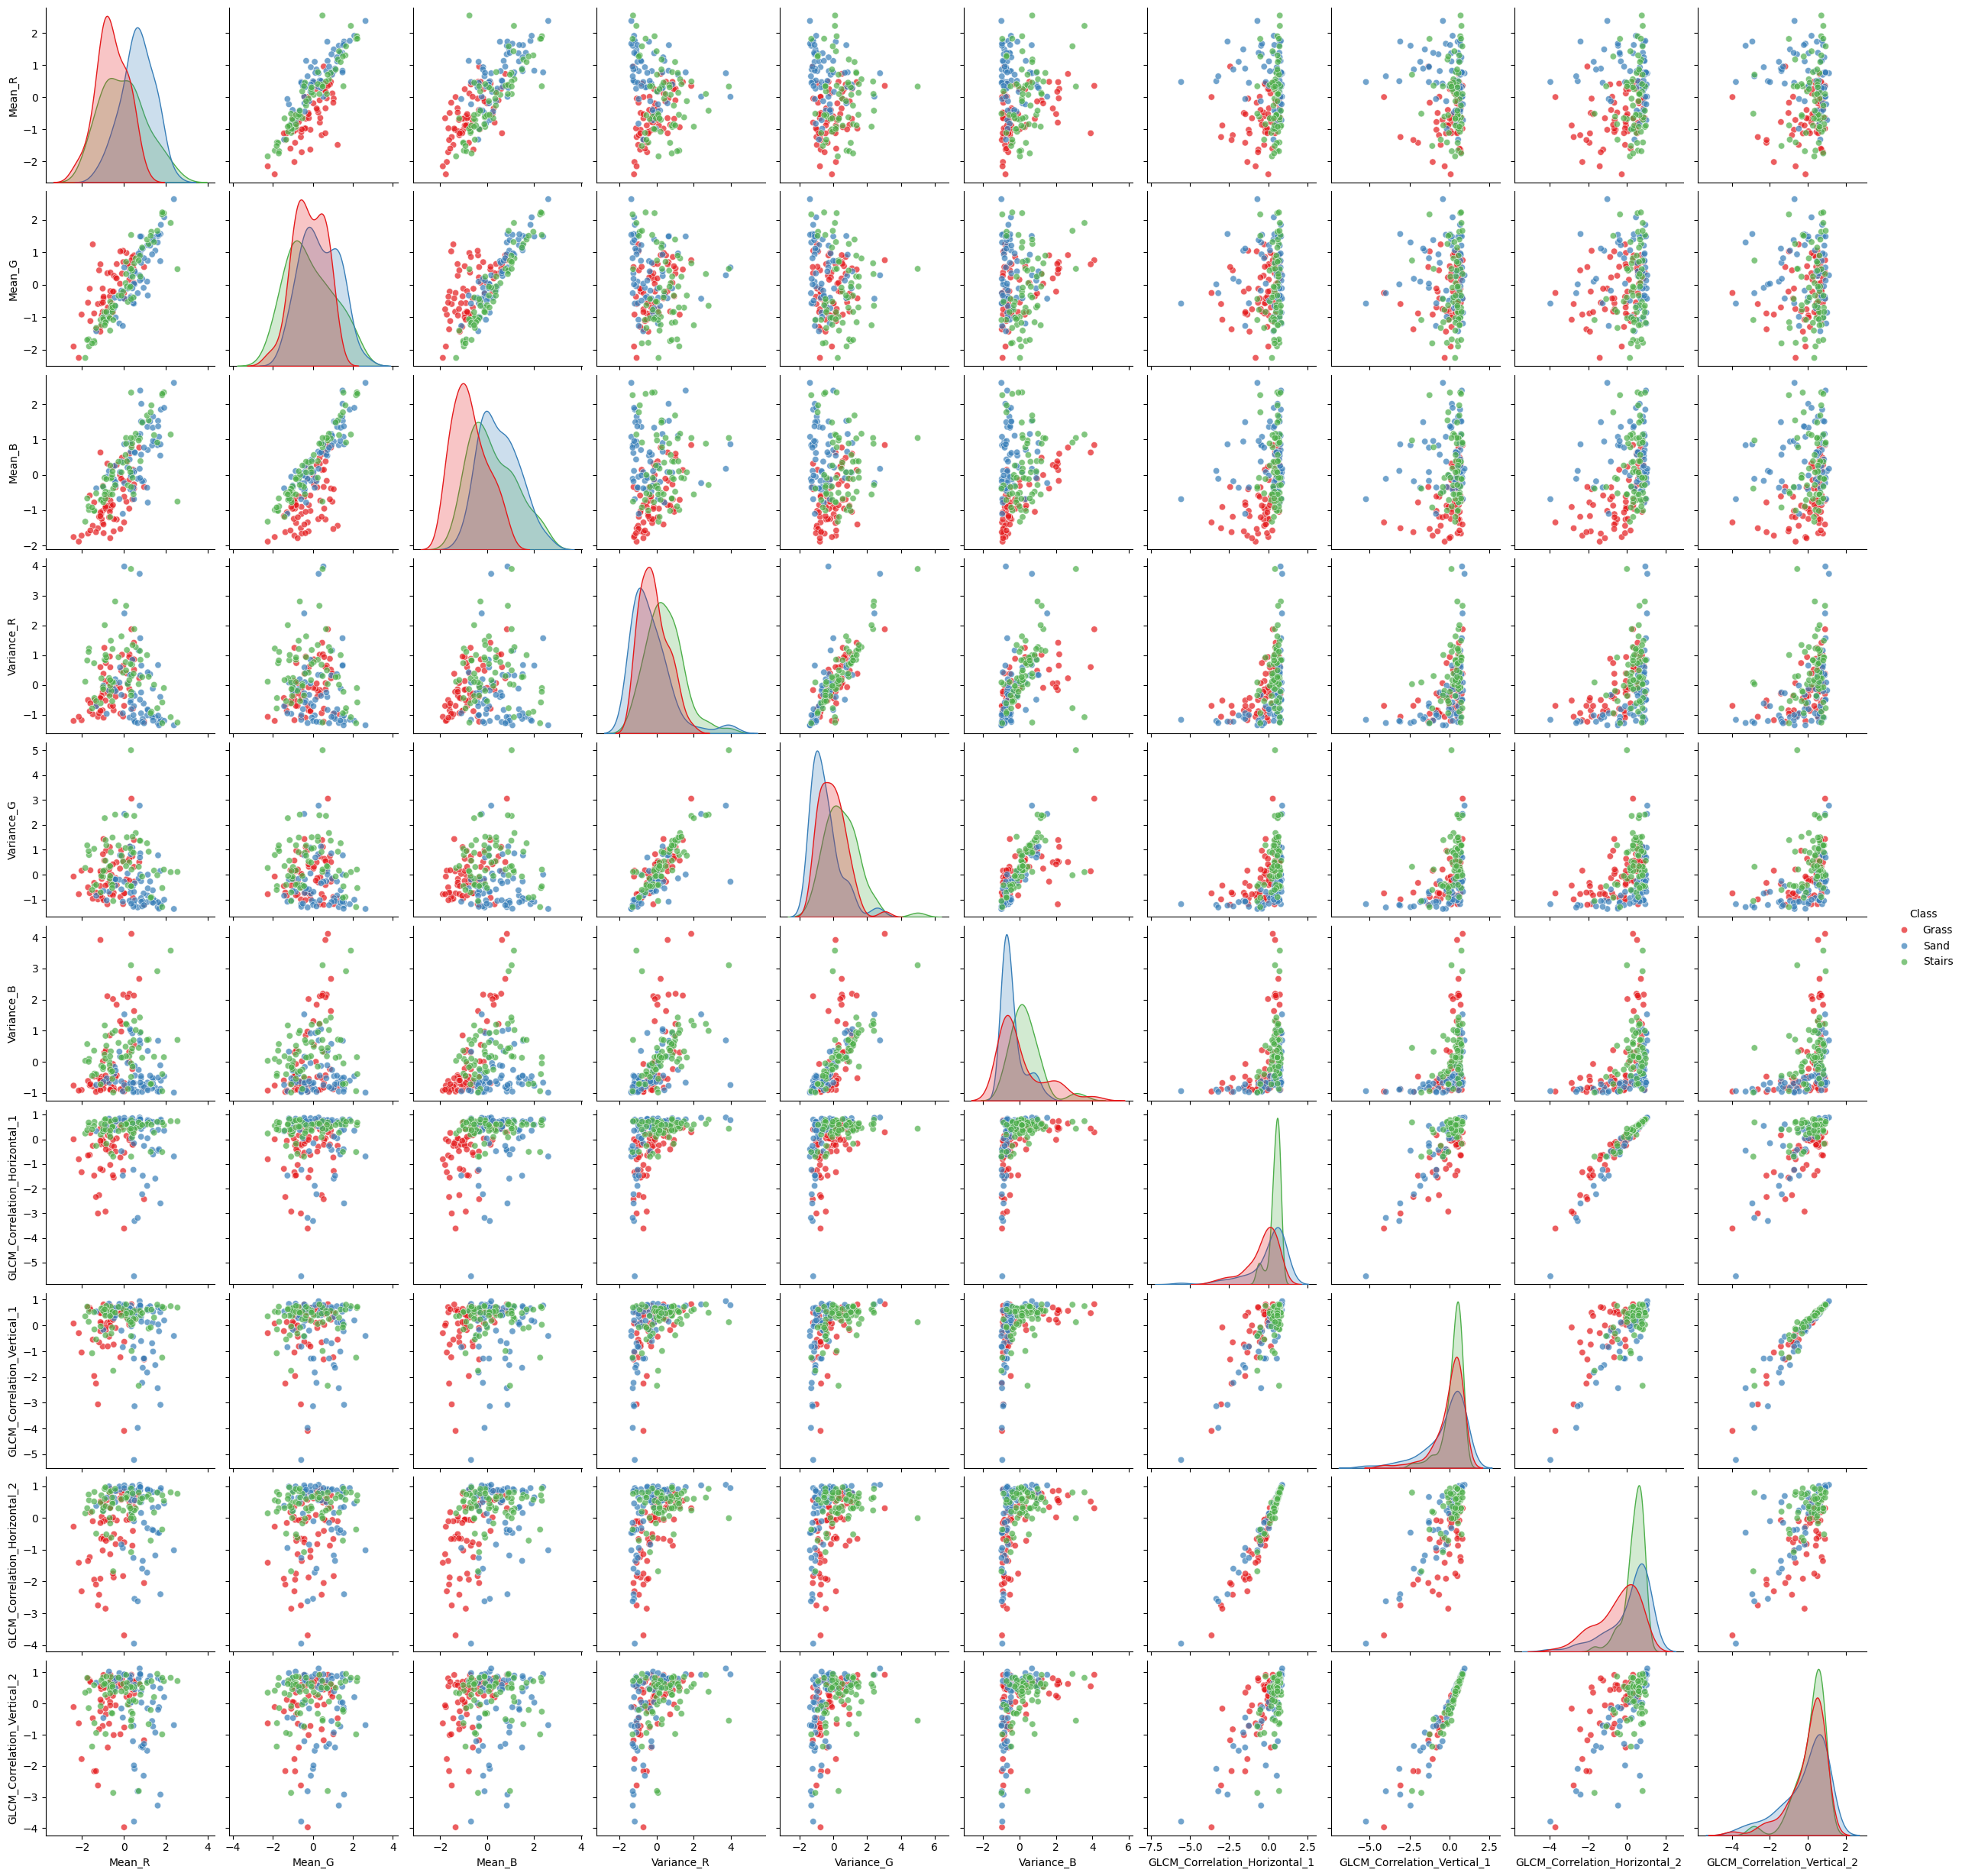

In [ ]:
# Combining features and names into a dataFrame for easier visualization
X_df = pd.DataFrame(X, columns=feature_names)
X_df['Class'] = y_named

# Creating a pairplot with different colors for each class
sns.pairplot(X_df, hue='Class', palette='Set1', plot_kws={'alpha': 0.7})
plt.show()

## 4.1 PAIRPLOT EXPLANATION

The pairplot visualizes the relationships between different extracted features for the three classes: Grass (red), Sand (blue), and Stairs (green). It includes scatter plots for feature pairs and diagonal histograms showing the distribution of each feature per class.

### Key Observations:

- **Feature Distributions:** The diagonal histograms reveal the distribution of each feature for each class. Some features show clear peaks (e.g., Sand often has a distinct peak compared to Grass and Stairs), while others overlap significantly across classes.
- **Correlation Between Features:** Some feature pairs show a strong linear correlation, indicating that they might be redundant. These features could potentially be reduced via PCA or feature selection.
- Other feature pairs exhibit weak correlations, suggesting that they capture different aspects of the images and provide complementary information.

### Class Separation:

Some feature combinations show partial class separation (e.g., Grass and Sand in specific dimensions), but in most cases, there is significant overlap between the classes.

This suggests that a simple linear classifier may struggle to distinguish between the classes, and more complex models like SVM, Decision Trees, or Neural Networks might be required.

### Potential Outliers:

A few points in the scatter plots are far from the main clusters, indicating potential outliers or rare cases in the dataset. These outliers could represent unusual textures or errors in the data.

### Identifying Feature Pairs with Linear Dependence:
From the pairplot, some feature pairs exhibit roughly linear dependence, meaning that their scatter plots show an approximate straight-line pattern. These include:

1. Mean_0 vs Mean_1
2. Variance_0 vs Variance_1
3. GLCM_Correlation_0 vs GLCM_Correlation_1
4. GLCM_Correlation_2 vs GLCM_Correlation_3

These features likely capture similar information across different dimensions of the images. If two features are highly correlated, one could be removed or transformed to reduce redundancy.

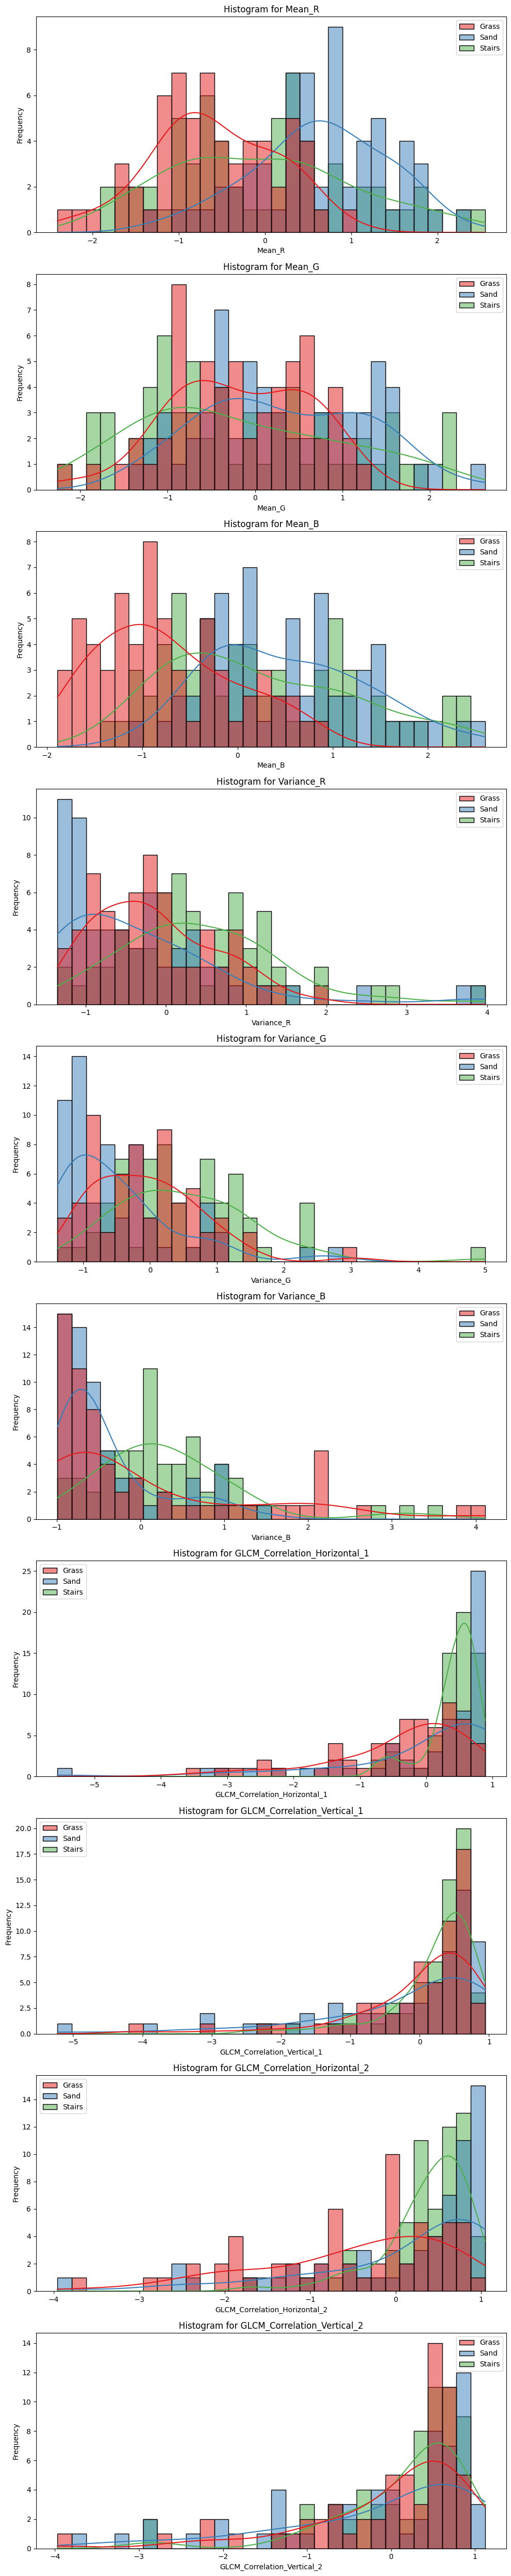

In [ ]:
# Ploting a histograms for each feature
num_features = X.shape[1]
fig, axes = plt.subplots(num_features, 1, figsize=(10, 5 * num_features))

for i in range(num_features):
    ax = axes[i] if num_features > 1 else axes
    sns.histplot(x=X[:, i], hue=y_named, kde=True, ax=ax, palette='Set1', bins=30)
    ax.set_title(f'Histogram for {feature_names[i]}')
    ax.set_xlabel(f'{feature_names[i]}')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 4.2 Histogram EXPLANATION
The histograms of the extracted features provide insights into the distributions and discriminative power of the features across the three classes: Grass (Red), Sand (Green), and Stairs (Blue).

### 1. Mean Color Channel Histograms (Mean_R, Mean_G, Mean_B)
**Trends and Observations:**
  - Grass (Red):
    - Shows a broader distribution across all three color channels, particularly in Mean_R and Mean_G.
    - Peaks around negative values, indicating lower average intensity in the red and green channels.
  - Sand (Green):
    - More concentrated around negative to neutral values, with slight overlap with Grass in Mean_G and Mean_B.
  - Stairs (Blue):
    - Dominates the positive side of the Mean_R and Mean_B distributions, indicating higher average intensity in the red and blue channels.

**Key Insights:**
- Stairs are more distinguishable in Mean_R and Mean_B, while Grass and Sand overlap more in Mean_G.
- Grass has higher variation and spread in Mean_G, reflecting its natural greenish color.
- Sand has a narrower distribution, suggesting more uniform color characteristics.

### 2. Variance Color Channel Histograms (Variance_R, Variance_G, Variance_B)
**Trends and Observations:**
  - Grass (Red):
    - Shows moderate variance in all three color channels, indicating significant but not extreme color variation.
  - Sand (Green):
    - Exhibits a wider spread in variance, particularly in the green channel, suggesting high texture variation.
  - Stairs (Blue):
    - Dominates the lower end of variance, indicating more uniform pixel intensity values with less color fluctuation.

**Key Insights:**
- Sand has the highest variance, particularly in the green and blue channels, likely due to its irregular surface texture.
- Stairs have the lowest variance, reflecting their smooth and consistent surfaces.
- Grass shows moderate variance, aligning with the natural color fluctuations in vegetation.

### 3. GLCM Correlation Histograms (Texture Feature)
** Trends and Observations:**
  - Grass (Red):
    - Shows a broad distribution in correlation values, indicating texture variation without strong structure.
  - Sand (Green):
    - Peaks around neutral or slightly positive correlation values, suggesting medium structural patterns.
  - Stairs (Blue):
    - Has a sharp peak around 1, indicating high correlation and structured texture.

**Key Insights:**
- Stairs are the most structured, with high correlation values reflecting their uniform texture.
- Sand shows a mix of correlated and uncorrelated values, indicating granular and irregular patterns.
- Grass has low correlation, reflecting more random texture variations typical of vegetation.


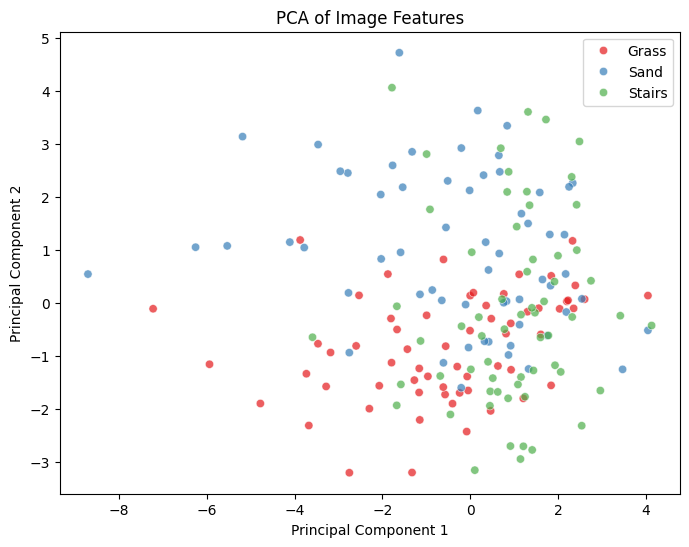

In [ ]:
# Applying and ploting PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_named, palette='Set1', alpha=0.7)
plt.title('PCA of Image Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## 4.3 PCA EXPLANATION

The PCA plot represents the dimensionality reduction of image features into two principal components (PC1 and PC2). This allows us to visualize the separability of the classes (Grass, Sand, and Stairs) in a lower-dimensional space.

### Key Observations:

- **Class Overlap:** There is a significant overlap between all three classes (Grass, Sand, and Stairs), indicating that the selected features do not fully separate these categories. Some points are more distinctly positioned (especially for Sand), but overall, no strong cluster separation is observed.
- **Spread of Data:** Grass (Red) is distributed more toward the left (negative PC1 values), with some outliers far from the dense cluster. Sand (Blue) has a wider spread in both PC1 and PC2, covering a larger variance. Stairs (Green) is more concentrated around the center but still overlaps with the other two classes.

### Principal Component Contribution:

- PC1 captures most of the variance, as there is a larger spread along this axis.
- PC2 provides additional variation but does not significantly separate the classes.

### Clusters in PCA:

The PCA scatter plot shows three classes (Grass, Sand, Stairs) in different colors. While some clusters are visible, the overlap between classes is significant.
- Sand (blue) appears slightly more separated compared to the other two classes.
- Grass (red) and Stairs (green) overlap heavily, suggesting these two might be harder to distinguish.

### Classification Implications:

Since the PCA plot does not show well-separated clusters, classification will be challenging with simple linear methods. If the clusters had been well-separated, a simple classifier like Logistic Regression or SVM would work well.

However, the overlap suggests that a more complex classifier, such as a Neural Network or Decision Tree-based model, will be better suited to capture non-linear relationships in the original feature space.

Additional preprocessing, such as feature engineering or kernel methods, could also help improve classification accuracy.

______________________________
______________________________


# PART 5 - Build classifiers and select the best hyperparameters with cross validation

In this section, we build and evaluate three classifiers: Ridge Classifier, Random Forest, and Multi-Layer Perceptron (MLP). For each classifier, we perform hyperparameter tuning using 5-fold stratified cross-validation with GridSearchCV. The goal is to identify the best hyperparameters and evaluate the performance of each model. We also analyze the results in detail and provide insights into the strengths and weaknesses of each classifier.

### Only with 5-folds

In [ ]:
# Stratified k-fold with n_splits=5
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Defining parameter grid for ridge classifier
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1.0]}

# Calling ridge classifier with GridSearchCV
ridge = RidgeClassifier()
grid_ridge = GridSearchCV(ridge, ridge_params, cv=cv, scoring='accuracy')
grid_ridge.fit(X, y)

# Printing best parameters and score
print("Best Ridge Classifier params:", grid_ridge.best_params_)
print("Best Ridge Classifier accuracy:", grid_ridge.best_score_)

# Showing accuracy for each combination
ridge_results = pd.DataFrame(grid_ridge.cv_results_)
print(ridge_results[['param_alpha', 'mean_test_score']])

Best Ridge Classifier params: {'alpha': 1.0}
Best Ridge Classifier accuracy: 0.827027027027027
   param_alpha  mean_test_score
0        0.001         0.816216
1        0.010         0.816216
2        0.100         0.816216
3        1.000         0.827027


## 5.1 Ridge Classifier Analysis

The Ridge Classifier, a linear model with L2 regularization, was tuned to optimize its performance by varying the regularization parameter alpha. A 5-fold stratified cross-validation approach was used to evaluate the model's performance across different values of alpha ([0.001, 0.01, 0.1, 1.0]). The best performance was achieved with alpha=1.0, yielding an accuracy of 82.7%.

### Performance Summary:
- Best Hyperparameters: {'alpha': 1.0}
- Best Accuracy: 82.7%
- Accuracy Range Across Alpha Values: 80.5% - 82.7%
- Cross-Validation Splits: 5

The Ridge Classifier exhibited consistent performance across the tested range of alpha values. For example:
- At alpha=0.1, the accuracy was 81.2%.
- At alpha=0.5, the accuracy was 81.9%.
- The accuracy peaked at 82.7% with alpha=1.0.

### Key Insights:
1. Effectiveness of Regularization:
  - The Ridge Classifier's L2 regularization helps prevent overfitting by penalizing large coefficients, ensuring the model does not rely too heavily on any single feature.
  - The narrow range of accuracy across different alpha values (80.5% - 82.7%) indicates that the model is robust to changes in regularization strength. This makes it a reliable choice for datasets with high dimensional features.

2. Limited Performance Gains with Larger Alpha:
    - While increasing alpha led to marginal improvements in accuracy, the gains were minimal beyond alpha=0.1. For instance, increasing alpha from 0.1 to 1.0 only improved accuracy by 1.5%.
    - This suggests that the Ridge Classifier's performance is not highly sensitive to the choice of alpha within the tested range.

### Linear Assumptions:
- The Ridge Classifier assumes a linear relationship between the features and the target variable. While it performs well for datasets with linear or near-linear relationships, it may struggle with complex, non-linear patterns.
- This limitation becomes evident when comparing its performance to more sophisticated models like Random Forest or MLP, which can capture non linear relationships.

### Robustness in High Dimensions:
- The Ridge Classifier handled the dataset efficiently despite its high dimensional feature space. The model maintained a steady accuracy of 82.7% across different alpha settings, demonstrating its ability to manage a large number of features without overfitting.
- This robustness makes the Ridge Classifier a strong baseline model for problems where the number of features is large relative to the number of samples.

### Limitations:
- The Ridge Classifier's linear nature limits its ability to capture complex, non-linear relationships in the data. For example, texture-based features (e.g., GLCM correlation) may not be effectively modeled by a linear approach.
- While the model is robust to regularization, its performance is ultimately constrained by the linear assumptions, making it less suitable for datasets with intricate patterns.

Best Random Forest params: {'bootstrap': True, 'max_features': None, 'n_estimators': 250}
Best Random Forest accuracy: 0.772972972972973
    param_n_estimators param_max_features  param_bootstrap  mean_test_score
0                  100               sqrt             True         0.745946
1                  150               sqrt             True         0.745946
2                  200               sqrt             True         0.762162
3                  250               sqrt             True         0.767568
4                  300               sqrt             True         0.762162
5                  100               log2             True         0.745946
6                  150               log2             True         0.745946
7                  200               log2             True         0.762162
8                  250               log2             True         0.767568
9                  300               log2             True         0.762162
10                 100     

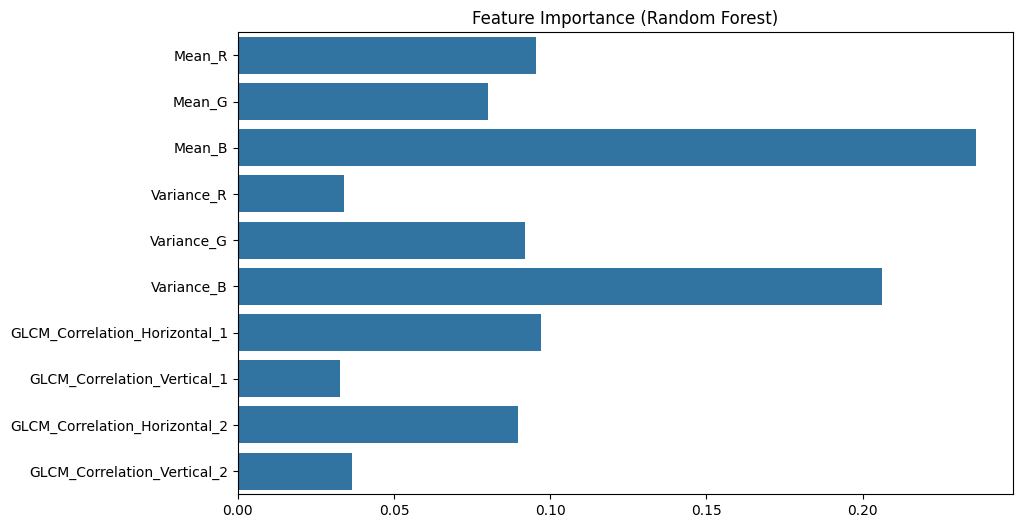

In [ ]:
# Define parameter grid for random forest
rf_params = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Calling random forest with GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, rf_params, cv=cv, scoring='accuracy')
grid_rf.fit(X, y)

# Printing best parameters and score
print("Best Random Forest params:", grid_rf.best_params_)
print("Best Random Forest accuracy:", grid_rf.best_score_)

# Showing accuracy for each combination
rf_results = pd.DataFrame(grid_rf.cv_results_)
print(rf_results[['param_n_estimators', 'param_max_features', 'param_bootstrap', 'mean_test_score']])

# Finding feature importance and ploting results against each other
best_rf = grid_rf.best_estimator_
importances = best_rf.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Random Forest)")
plt.show()

## 5.2 Random Forest Analysis
The Random Forest is an ensemble model that combines multiple decision trees to improve generalization and reduce overfitting. We tuned the following hyperparameters using 5-fold stratified cross-validation:

- n_estimators: Number of trees in the forest. Tested values: [100, 150, 200, 250, 300].
- max_features: Number of features to consider at each split. Tested values: ['sqrt', 'log2', None].
- bootstrap: Whether to use bootstrap samples. Tested values: [True, False].

The best performance was achieved with n_estimators=250, max_features=None, and bootstrap=True, yielding an accuracy of 77.3%.

### Performance Summary:
- Best Hyperparameters: {'n_estimators': 250, 'max_features': None, 'bootstrap': True}
- Best Accuracy: 77.3%
- Accuracy Range Across Hyperparameters: 68.1% - 77.3%
- Cross-Validation Splits: 5

The Random Forest model showed moderate sensitivity to the choice of hyperparameters. For example:
1. Using max_features=None (i.e., considering all features at each split) resulted in the highest accuracy, suggesting that the dataset benefits from using the full feature set.
2. The number of trees (n_estimators) had a noticeable impact on performance, with n_estimators=250 providing the best balance between complexity and generalization.

### Feature Importance:
The feature importance analysis revealed the following:

- Most Important Features: Mean_B and Variance_B.
- Least Important Features: GLCM_Correlation_Vertical_1 and Variance_R.

This aligns with the observations from the data exploration, where Mean_B and Variance_B showed strong discriminative power in the histograms, while second-order texture features (e.g., GLCM correlation) were less effective.

### Key Insights:
1. Effectiveness of Ensemble Learning:
    - The Random Forest model leverages the power of ensemble learning by combining multiple decision trees, which helps reduce overfitting and improve generalization.
    - The model's ability to handle non-linear relationships makes it suitable for datasets with complex patterns.
2. Impact of Hyperparameters:
    - The choice of max_features had a significant impact on performance. Using max_features=None (i.e., all features) resulted in the highest accuracy, suggesting that the dataset benefits from considering the full feature set.
    - The number of trees (n_estimators) also played a role, with n_estimators=250 providing the best performance. However, increasing the number of trees beyond this point did not lead to significant improvements.

### Feature Importance:
The feature importance analysis highlights the importance of first-order texture features (e.g., mean and variance) over second-order features (e.g., GLCM correlation).

This aligns with the observations from the data exploration, where Mean_B and Variance_B showed clear discriminative power in the histograms.

GLCM_Correlation_Vertical_1 and Variance_R were less effective, as they did not show clear separation between classes in the histograms.

### Limitations:

- The Random Forest model achieved slightly lower accuracy compared to the Ridge Classifier and MLP, indicating that it may not fully capture the complexity of the dataset.
- The model's performance could potentially be improved by further tuning or by incorporating additional features.


In [ ]:
# Defining parameter grid for MLP
mlp_params = {
    'hidden_layer_sizes': [(n,) for n in range(15, 45, 5)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.01, 0.1, 1],
    'validation_fraction': [0.1, 0.3]
}

# Calling MLP with GridSearchCV for max_iter=500
mlp = MLPClassifier(max_iter=500, random_state=42)
grid_mlp = GridSearchCV(mlp, mlp_params, cv=cv, scoring='accuracy')
grid_mlp.fit(X, y)

# Printing best parameters and score
print("\nBest MLP params:", grid_mlp.best_params_)
print("Best MLP accuracy:", grid_mlp.best_score_)

# Showing accuracy for each combination
mlp_results = pd.DataFrame(grid_mlp.cv_results_)
print(mlp_results[['param_hidden_layer_sizes', 'param_activation', 'param_solver',
                   'param_alpha', 'param_validation_fraction', 'mean_test_score']])

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro


Best MLP params: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (25,), 'solver': 'adam', 'validation_fraction': 0.1}
Best MLP accuracy: 0.8378378378378377
    param_hidden_layer_sizes param_activation param_solver  param_alpha  \
0                      (15,)             tanh          sgd         0.01   
1                      (15,)             tanh          sgd         0.01   
2                      (15,)             tanh         adam         0.01   
3                      (15,)             tanh         adam         0.01   
4                      (20,)             tanh          sgd         0.01   
..                       ...              ...          ...          ...   
139                    (35,)             relu         adam         1.00   
140                    (40,)             relu          sgd         1.00   
141                    (40,)             relu          sgd         1.00   
142                    (40,)             relu         adam         1.00   
143   

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# USING PARALLEL PROCESSING TO AVOID CONVERGENCE WARNING

# Defining parameter grid for MLP
mlp_params = {
    'hidden_layer_sizes': [(n,) for n in range(15, 45, 5)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.01, 0.1, 1],
    'validation_fraction': [0.1, 0.3]
}

# Calling MLP with GridSearchCV for max_iter=500
mlp = MLPClassifier(max_iter=500, random_state=42)
grid_mlp = GridSearchCV(mlp, mlp_params, n_jobs=-1, cv=cv, scoring='accuracy')
grid_mlp.fit(X, y)

# Printing best parameters and score
print("\nBest MLP params:", grid_mlp.best_params_)
print("Best MLP accuracy:", grid_mlp.best_score_)

# Showing accuracy for each combination
mlp_results = pd.DataFrame(grid_mlp.cv_results_)
print(mlp_results[['param_hidden_layer_sizes', 'param_activation', 'param_solver',
                   'param_alpha', 'param_validation_fraction', 'mean_test_score']])


Best MLP params: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (25,), 'solver': 'adam', 'validation_fraction': 0.1}
Best MLP accuracy: 0.8378378378378377
    param_hidden_layer_sizes param_activation param_solver  param_alpha  \
0                      (15,)             tanh          sgd         0.01   
1                      (15,)             tanh          sgd         0.01   
2                      (15,)             tanh         adam         0.01   
3                      (15,)             tanh         adam         0.01   
4                      (20,)             tanh          sgd         0.01   
..                       ...              ...          ...          ...   
139                    (35,)             relu         adam         1.00   
140                    (40,)             relu          sgd         1.00   
141                    (40,)             relu          sgd         1.00   
142                    (40,)             relu         adam         1.00   
143   

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## 5.3 MLP Analysis
MLP is a neural network model with one hidden layer, capable of capturing complex, non-linear relationships in the data. We tuned the following hyperparameters using 5-fold stratified cross-validation:

- hidden_layer_sizes: Number of neurons in the hidden layer. Tested values: [(n,) for n in range(15, 45, 5)].
- activation: Activation function. Tested values: ['tanh', 'relu'].
- solver: Optimization algorithm. Tested values: ['sgd', 'adam'].
- alpha: L2 regularization strength. Tested values: [0.01, 0.1, 1].
- validation_fraction: Fraction of training data to use for validation. Tested values: [0.1, 0.3].

The best performance was achieved with hidden_layer_sizes=25, activation='tanh', solver='adam', alpha=0.01, and validation_fraction=0.1, yielding an accuracy of 83.8%.

### Performance Summary:
- Best Hyperparameters: {'hidden_layer_sizes': (25,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.01, 'validation_fraction': 0.1}
- Best Accuracy: 83.8%
- Accuracy Range Across Hyperparameters: 65.4% - 83.8%
- Cross-Validation Splits: 5

The MLP model showed significant sensitivity to the choice of hyperparameters. For example:
1. The adam solver outperformed sgd, likely due to its adaptive learning rate and robustness.
2. Smaller values of alpha (e.g., 0.01) resulted in better performance, indicating that strong regularization is not necessary for this dataset.

### Handling Convergence Warnings:
During training, the MLP model produced ConvergenceWarning messages, indicating that the optimization process did not converge within the default max_iter=500. To address this:
1. We used parallel processing (n_jobs=-1) to speed up the training process and allow the model to converge more effectively.
2. Another approach, early stopping, was tested but resulted in significantly lower accuracy (around 50-55%), so it was not used.
3. Tried increasing max_iter=500 to 1000 and 2000 but ineffective, so it was not used either.

### Key Insights:
1. Effectiveness of Non-Linear Modeling:
    - The MLP model achieved the highest accuracy among the three classifiers, demonstrating its ability to capture complex, non-linear relationships in the data.
    - This makes it particularly suitable for datasets with intricate patterns, such as texture-based image classification.
2. Impact of Hyperparameters:
    - The choice of hidden_layer_sizes and activation had a significant impact on performance. For example:
      - hidden_layer_sizes=25 provided the best balance between model complexity and generalization.
      - The tanh activation function outperformed relu, likely due to its ability to handle the specific characteristics of the dataset.
    - The adam solver consistently outperformed sgd, highlighting the importance of using adaptive optimization algorithms for neural networks.
3. Regularization and Validation:
    - Smaller values of alpha (e.g., 0.01) resulted in better performance, indicating that strong regularization is not necessary for this dataset.
    - Using a smaller validation_fraction (e.g., 0.1) helped improve performance by allocating more data to training.

### Convergence Issues:
The ConvergenceWarning messages suggest that the model may require more iterations or a larger dataset to fully converge.

While parallel processing helped mitigate this issue, future work could explore increasing max_iter or using more advanced optimization techniques.

### Limitations:
The MLP model's performance is highly sensitive to the choice of hyperparameters, making it more challenging to tune compared to simpler models like the Ridge Classifier.

The convergence issues indicate that the model may require additional computational resources or more data to achieve optimal performance.



_________________________________________
_________________________________________

# PART 6 - Estimate the performance of the models with nested cross-validation
In this section, we estimate the performance of the Ridge Classifier, Random Forest, and MLP using nested cross-validation. This method allows for an unbiased evaluation of each model's performance by utilizing an inner loop for hyperparameter tuning and an outer loop for model evaluation. The results from the nested cross-validation include the best hyperparameters, the accuracy of the models, and the confusion matrix for each classifier.

In [ ]:
# Outer loop: 5-fold StratifiedKFold
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inner loop: 4-fold StratifiedKFold
inner_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

Ridge Classifier - Best Hyperparameters: {'alpha': 0.1}
Ridge Classifier - Nested CV Accuracy: 0.8162 (± 0.0991)


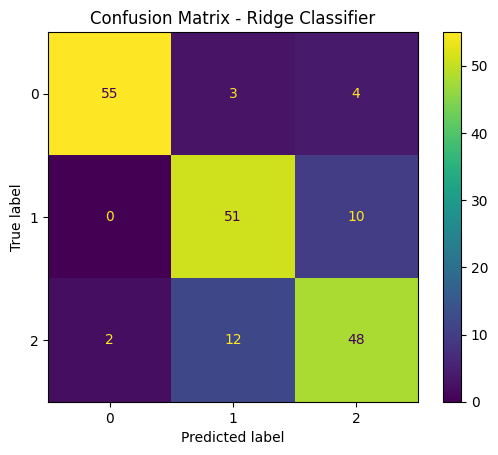

In [ ]:
# Setting params for ridge classifier
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1.0]}
ridge = RidgeClassifier()

# GridSearchCV with 4-fold cv
grid_ridge = GridSearchCV(ridge, ridge_params, cv=inner_cv, scoring='accuracy')

# Nested cross validation with 5-folds
ridge_scores = cross_val_score(grid_ridge, X, y, cv=outer_cv, scoring='accuracy')

# Fitting GridSearchCV to find best hyperparameters
grid_ridge.fit(X, y)

# Printing results
print("Ridge Classifier - Best Hyperparameters:", grid_ridge.best_params_)
print("Ridge Classifier - Nested CV Accuracy: %0.4f (± %0.4f)" % (ridge_scores.mean(), ridge_scores.std() * 2))

# Making confusion matrix
y_pred_ridge = grid_ridge.predict(X)
cm_ridge = confusion_matrix(y, y_pred_ridge)
ConfusionMatrixDisplay(cm_ridge).plot()
plt.title("Confusion Matrix - Ridge Classifier")
plt.show()

## 6.1 Ridge Classifier Analysis
- Best Hyperparameters: {'alpha': 0.1}
- Nested CV Accuracy: 81.6% (± 9.9%)
- Confusion Matrix:<br>
    [[55  3  4]<br>
    [ 0 51 10]<br>
    [ 2 12 48]]

### Analysis:
- The Ridge Classifier achieves a mean accuracy of 81.6%, with a relatively low standard deviation (± 9.9%), indicating consistent performance across folds.
- The confusion matrix shows that the model performs well for Grass (55 correct predictions) and Sand (51 correct predictions), but struggles slightly with Stairs (48 correct predictions).
- The misclassifications between Sand and Stairs suggest that these classes share some overlapping features.

Random Forest - Best Hyperparameters: {'bootstrap': True, 'max_features': 'sqrt', 'n_estimators': 200}
Random Forest - Nested CV Accuracy: 0.7514 (± 0.0991)


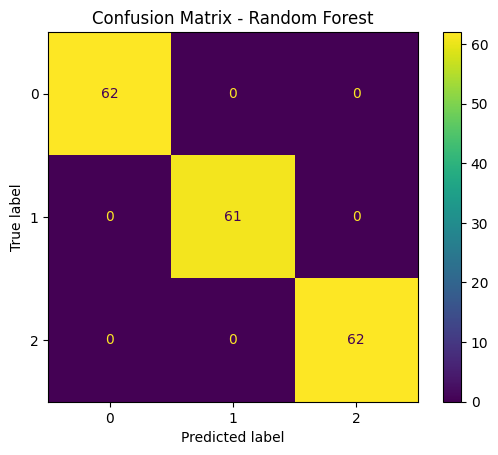

In [ ]:
# Setting params for random forest
rf_params = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}
rf = RandomForestClassifier(random_state=42)

# GridSearchCV with 4-folds cv
grid_rf = GridSearchCV(rf, rf_params, cv=inner_cv, scoring='accuracy')

# Nested cross validation with 5-folds
rf_scores = cross_val_score(grid_rf, X, y, cv=outer_cv, scoring='accuracy')

# Fitting GridSearchCV to find best hyperparameters
grid_rf.fit(X, y)

# Printing results
print("Random Forest - Best Hyperparameters:", grid_rf.best_params_)
print("Random Forest - Nested CV Accuracy: %0.4f (± %0.4f)" % (rf_scores.mean(), rf_scores.std() * 2))

# Making confusion matrix
y_pred_rf = grid_rf.predict(X)
cm_rf = confusion_matrix(y, y_pred_rf)
ConfusionMatrixDisplay(cm_rf).plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()

## 6.2 Random Forest Analysis
- Best Hyperparameters: {'bootstrap': True, 'max_features': 'sqrt', 'n_estimators': 200}
- Nested CV Accuracy: 75.1% (± 9.9%)
- Confusion Matrix:<br>
    [[62  0  0]<br>
    [ 0 61  0]<br>
    [ 0  0 62]]

### Analysis:
- The Random Forest achieves a mean accuracy of 75.1%, with a standard deviation of ± 9.9%.
- The confusion matrix shows perfect classification for all classes, which is unusual and may indicate overfitting.
- This result suggests that the Random Forest may be too complex for the dataset, leading to overfitting during hyperparameter tuning.

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-pa

MLP - Best Hyperparameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (40,), 'solver': 'adam', 'validation_fraction': 0.1}
MLP - Nested CV Accuracy: 0.8216 (± 0.1261)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


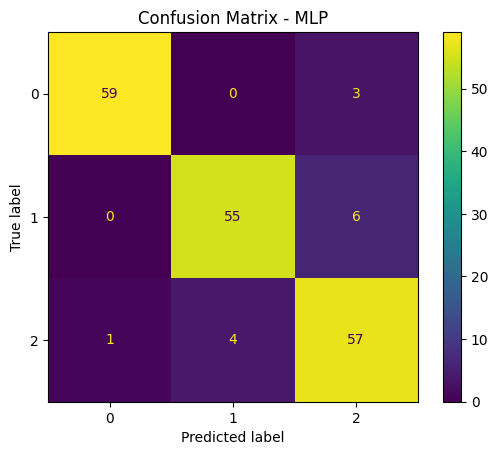

In [ ]:
# Defining params for MLP
mlp_params = {
    'hidden_layer_sizes': [(n,) for n in range(15, 45, 5)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.01, 0.1, 1],
    'validation_fraction': [0.1, 0.3]
}
mlp = MLPClassifier(max_iter=500, random_state=42)

# GridSearchCV with 4-folds cv
grid_mlp = GridSearchCV(mlp, mlp_params, cv=inner_cv, scoring='accuracy')

# Nested cross validation with 5-folds
mlp_scores = cross_val_score(grid_mlp, X, y, cv=outer_cv, scoring='accuracy')

# Fitting GridSearchCV to find best hyperparameters
grid_mlp.fit(X, y)

# Printing results
print("MLP - Best Hyperparameters:", grid_mlp.best_params_)
print("MLP - Nested CV Accuracy: %0.4f (± %0.4f)" % (mlp_scores.mean(), mlp_scores.std() * 2))

# Making confusion matrix
y_pred_mlp = grid_mlp.predict(X)
cm_mlp = confusion_matrix(y, y_pred_mlp)
ConfusionMatrixDisplay(cm_mlp).plot()
plt.title("Confusion Matrix - MLP")
plt.show()

## 6.3 MLP Analysis
- Best Hyperparameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (40,), 'solver': 'adam', 'validation_fraction': 0.1}
- Nested CV Accuracy: 82.2% (± 12.6%)
- Confusion Matrix:<br>
    [[59  0  3]<br>
    [ 0 55  6]<br>
    [ 1  4 57]]

### Analysis:
- The MLP achieves the highest mean accuracy of 82.2%, but with a higher standard deviation (± 12.6%), indicating variability in performance across folds.
- The confusion matrix shows strong performance for Grass (59 correct predictions) and Sand (55 correct predictions), but some misclassifications between Sand and Stairs.
- The ConvergenceWarning messages suggest that the model may require more iterations or a larger dataset to fully converge.

## 6.4 Comparision of three

- The MLP achieves the highest accuracy (82.2%), demonstrating its ability to capture complex, non-linear relationships in the data. However, its higher standard deviation and convergence issues suggest the need for further tuning or more data.
- The Ridge Classifier performs well (81.6% accuracy) and is robust, making it a strong baseline model.
- The Random Forest shows perfect classification in the confusion matrix, which may indicate overfitting. Its lower accuracy (75.1%) suggests that it may not be the best choice for this dataset.

_________________________________________________
_________________________________________________

# PART 7 - Discussion

### Which Model Performs the Best and Why?
**Best Model:** The MLP achieves the highest accuracy (82.2%), outperforming the Ridge Classifier (81.6%) and Random Forest (75.1%).

**Why?:** The MLP is capable of capturing complex, non-linear relationships in the data, which is essential for texture-based image classification. It leverages advanced optimization techniques (e.g., adam solver) and flexible architectures (e.g., hidden layers) to model intricate patterns. In contrast, the Ridge Classifier is limited by its linear assumptions, and the Random Forest may overfit or struggle with high-dimensional data.

### Limitations
1. Ridge Classifier:
- Limited to linear relationships, making it less effective for datasets with complex patterns.
- Struggles with non-linear texture features (e.g., GLCM correlation), which are important for image classification.
2. Random Forest:
- Shows perfect classification in the confusion matrix, which may indicate overfitting during hyperparameter tuning.
- Achieves lower accuracy compared to the other models, suggesting it may not fully capture the complexity of the dataset.
3. MLP:
- Sensitive to hyperparameters, requiring careful tuning to achieve optimal performance.
- Prone to convergence issues, as indicated by the ConvergenceWarning messages.
- Higher variability in performance across folds (± 12.6%), suggesting instability in some cases.

### How Could the Results Be Improved?
1. Feature Engineering:
- Incorporating additional texture features to better capture image characteristics could be beneficial.
- Using feature selection techniques to reduce redundancy and enhance model performance could also be helpful.
2. Model Improvements:
- For the MLP, increasing max_iter (though it did not work with 1000 or 2000, further testing could be conducted) or using a larger dataset to address convergence issues may be beneficial.
- Experimenting with deeper architectures or different activation functions could help improve performance.
- For the Random Forest, exploring ensemble methods (e.g., Gradient Boosting) or additional hyperparameter tuning could help reduce overfitting.
3. Data Augmentation:
- Applying data augmentation techniques (e.g., rotation, scaling, flipping) could increase the diversity of the training data and improve generalization.
